# Frekvenstabell og -diagram

## Frekvenstabell

Vi skal nå lære å lage frekvenstabeller med Pandas. Vi måler høyden til noen studenter, og får følgende (i cm, rundet til nærmeste 5):

```
165, 175, 190, 190, 170, 170, 185, 160, 170, 165, 180, 195, 185, 195, 185, 190, 185, 180, 185, 170
```

For å lage en frekvenstabell, lag en ny celle i notebooken (Insert -> Cell below), og sett inn følgende kode:

In [1]:
from pandas import Series

data = [165, 175, 190, 190, 170, 170, 185, 160, 170, 165, 180, 195, 185, 195, 185, 190, 185, 180, 185, 170]
hoyder = Series(data, name='Målinger')

frekvens = hoyder.value_counts().sort_index()

frekvens

160    1
165    2
170    4
175    1
180    2
185    5
190    3
195    2
Name: Målinger, dtype: int64

Det som skjer her er at først henter vi inn Series-klassen (1-dimensjonal struktur) fra Pandas. Series, sammen med DataFrame (2D-struktur), er de to datatypene vi kommer til å bruke mest fra Pandas. Series lager man enkelt ved å gi den en liste med data som første parameter, altså mellom parentesene.

Her lager vi først en liste med de tallene vi målte tidligere, og så legger vi dette inn som en Series. Denne blir lagret i `hoyder`. Vi gir også dataen vår et navn. Vi kan gjøre mye forskjellig med et Series-objekt, men vi er interessert i å lage en frekvenstabell. Dette kan vi gjøre med metoden `value_counts`. Denne tar dataen i serien vår, og lager et nytt objekt som teller opp antall forekomster av hver verdi i datamaterialet. For å få høydene i sortert rekkefølge, bruker vi også metoden `sort_index()`. Prøv gjerne koden uten denne, for å se forskjellen.

Den siste linjen "frekvens" er en slags returverdi, som forteller iPython at den skal printe/vise oss resultatet i denne variabelen.

Dette viser det vi er ute etter, men ser ikke så pent ut. Vi skal nå gjøre Series-objektet om til en DataFrame, som ble nevnt tidligere. DataFrame er en utvidelse av funksjonaliteten som finnes i Series. Vi skal her bruke DataFrame for å legge til kolonnenavn på frekvenstabellen vår, og få tegnet den opp på en bedre måte.

Lag en ny celle, med følgende kode:

In [2]:
frekvens_frame = frekvens.to_frame()
frekvens_frame.columns.name = 'Høyde (cm)'

frekvens_frame

Høyde (cm),Målinger
160,1
165,2
170,4
175,1
180,2
185,5
190,3
195,2


Det som først skjer her er at vi tar frekvens-variabelen fra forrige celle, og gjør den om til en DataFrame, med `to_frame`. Dette for å få tilgang til mer funksjonalitet.

Vi ønsker også å gi navn til verdiene fra våre opprinnelige data. Dette var en måling av studenters høyde, så da gir vi den navnet "Høyde (cm)", ved å sette "name"-verdien til kolonneobjektet. Som du ser over, får vi nå en fin tabell med beskrivende overskrifter.

## Plotting av frekvenstabell

Vi skal nå plotte frekvenstabellen vi har laget. Lag igjen en ny celle, og legg inn følgende:

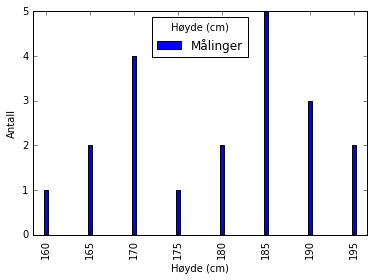

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

frekvens_frame.plot.bar(width=0.1)

plt.xlabel('Høyde (cm)')
plt.ylabel('Antall')

plt.show()

Den første linjen (som starter med %) gir beskjed til matplotlib, den pakken som er ansvarlig for å tegne grafene, om at vi vil ha alle figurer "inline", eller rett i dokumentet. Hvis man ikke har dette med, får man opp alle figurer i nytt vindu. Det kan være nyttig hvis du skal bearbeide og lagre figurene til bruk i andre applikasjoner, men ofte er det mest oversiktlig å se resultatet direkte i notebooken.

Deretter importerer vi pyplot-modulen, men for å spare litt skriving, gir vi den et "kallenavn", "plt". Det er denne som er ansvarlig for selve tegningen av grafene vi lager.

Vi henter så frem "plot"-funksjonaliteten i DataFrame, og sier at vi vil ha et "Bar chart". Det finnes mange ulike plottere. Se under "kind", [her](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html), for mer informasjon.

Til slutt sier vi til matplotlib at vi ønsker å se resultatet, med "plt.show()".

## Gjennomsnitt og median

Med Pandas kan vi veldig enkelt regne ut bl.a. gjennomsnitt, median og standardavvik. Vi må passe på at vi gjør disse operasjonene på riktig objekt. Hvis vi forsøker å regne gjennomsnitt på "frekvens" eller "frekvens_frame" som vi brukte til plotting, får vi gjennomsnittlig frekvens. Vil ønsker gjennomsnittlig høyde, så da må vi operere på "hoyder"-variabelen. Vi bruker "mean"-metoden og "median"-metoden for å finne hhv. gjennomsnitt og median.

In [4]:
gjsnitt = hoyder.mean()
median = hoyder.median()

# Bruker print til å vise verdiene. Print kan motta flere parametere, og vil sette inn mellomrom mellom disse:
print('Gjennomsnitt:', gjsnitt, 'cm')
print('Median:', median, 'cm')

Gjennomsnitt: 179.5 cm
Median: 182.5 cm


### Vise median og gjennomsnitt på diagram

Nå som vi har regnet ut median og gjennomsnitt, kan vi legge dette på diagrammet vårt. Vi kan dessverre ikke bruke Pandas plot-objekt direkte lenger. Dette skyldes at Pandas, bak fasaden, bruker 0, 1, 2, ... som indekser på aksene, og bare endrer tekstverdiene på det endelige diagrammet. Hvis vi prøvde å legge til en vertikal linje i x=180 ville den kommet langt utenfor figuren.

Pandas sin innebygde rutine fungerer med andre ord bra for enkle figurer, men det hender at man må bruke den underliggende matplotlib-pakken hvis man ønsker mer kontroll. Legg merke til at vi bruker "bar"-metoden fra "plt"-pakken, og ikke "plot.bar" på "frekvens_frame" som tidligere.

Gjennomsnitt: Grønn linje
Median: Rød linje


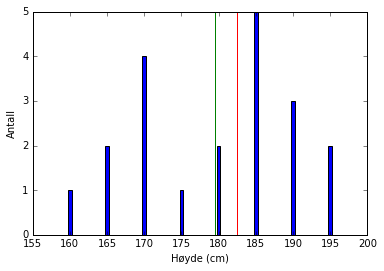

In [5]:
# Sett opp aksebeskrivelse for den nye figuren
plt.xlabel('Høyde (cm)')
plt.ylabel('Antall')

xs = frekvens_frame.index # X-verdiene fra pandas DataFrame
ys = frekvens_frame['Målinger']

plt.bar(xs, ys, width=0.5, align='center') # Bruker matplotlib/plt direkte, ved å bruke x- og y-verdiene over

# Tegne grønn linje for gjennomsnitt, og rød for median
plt.axvline(gjsnitt, color='g')
plt.axvline(median, color='r')

# Beskrivelse
print('Gjennomsnitt: Grønn linje')
print('Median: Rød linje')

plt.show()

### Standardavvik

I tillegg til metodene "mean" og "median", gir Pandas oss også enkel tilgang til utvalgsvarians- og standardavvik.

In [6]:
varians = hoyder.var()
std_av = hoyder.std()

print('Utvalgsvarians:', varians)
print('Utvalgsstandardavvik:', std_av)

Utvalgsvarians: 112.89473684210526
Utvalgsstandardavvik: 10.625193496690084


Vi kan legge standardavviket på diagrammet vårt. Vi lager nå et nytt diagram, men med samme verdier (vi bruker xs og ys som vi lagde i forrige avsnitt). Deretter tegner vi også gjennomsnitt og median på nytt, og til slutt standardavvik.

Til gjennomsnitt og median brukte vi metoden "axvline", som tegner en vertikal linje en gitt posisjon på x-aksen. Siden standardavviket dekker et større område, kan vi bruke "axvspan". Dette tegner et rektangel fra første parameter (gjennomsnitt-standardavvik) til andre parameter (gjennomsnitt+standardavvik). Vi angir så en farge, som tidligere.

Til slutt setter vi "alpha"-parameteren. Denne angir gjennomsiktighet, hvor 1.0 er full styrke, og 0.0 er usynlig.

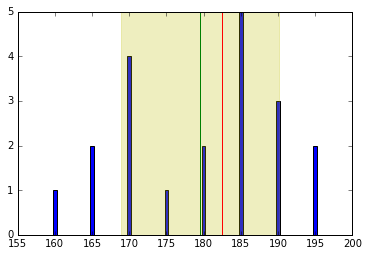

In [7]:
plt.bar(xs, ys, width=0.5, align='center') # Plotte stolpene på det nye diagrammet, med samme verdier som tidligere

# Tegne en grønn linje for gjennomsnitt, og rød for median, som tidligere
plt.axvline(gjsnitt, color='g')
plt.axvline(median, color='r')

# Tegner opp et nokså gjennomsiktig, gult rektangel for standardavvik
plt.axvspan(gjsnitt-std_av, gjsnitt+std_av, color='y', alpha=0.25)

plt.show()

## Kumulativ frekvenstabell og diagram

For å lage en kumulativ frekvenstabell, trenger vi kun å ta `frekvens_frame`, og kjøre cumsum på denne. Dette gjør vi ved å legge på `.cumsum()`, som vist under.

In [8]:
kumulativ_frekvens_frame = frekvens_frame.cumsum()
kumulativ_frekvens_frame

Høyde (cm),Målinger
160,1
165,3
170,7
175,8
180,10
185,15
190,18
195,20


Så flott! Nå kan vi plotte denne nye tabellen, slik som tidligere. Bare husk å bytte ut `frekvens_frame` med `kumulativ_frekvens_frame`, siden det var det vi kalte den nye tabellen:

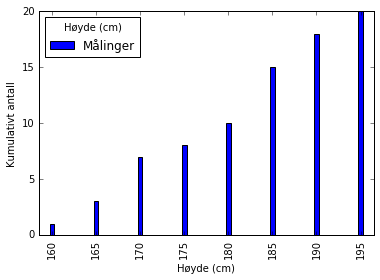

In [9]:
kumulativ_frekvens_frame.plot.bar(width=0.1)

plt.xlabel('Høyde (cm)')
plt.ylabel('Kumulativt antall')

plt.show()